#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 8
### Due: Monday, Mar 28th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on March 28th.

---

## Problem 1

**Phased LINEAR light curves**


Using the code snipplet below, load LINEAR light curves.


Extend the code to:

a) plot the light curves

b) compute the best period using a Fourier transformation

c) plot the phased data and best-fit curves.

d) Solve the problem by using Lomb-Scargle Periodograms.


In [9]:

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
import matplotlib
matplotlib.rc('_internal', classic_mode=True)

#------------------------------------------------------------
# Load the dataset
data = fetch_LINEAR_sample()
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]


#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for {0} ({1} points)".format(i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)


@pickle_results: using precomputed results from 'LINEAR_LS.pkl'


### Solution

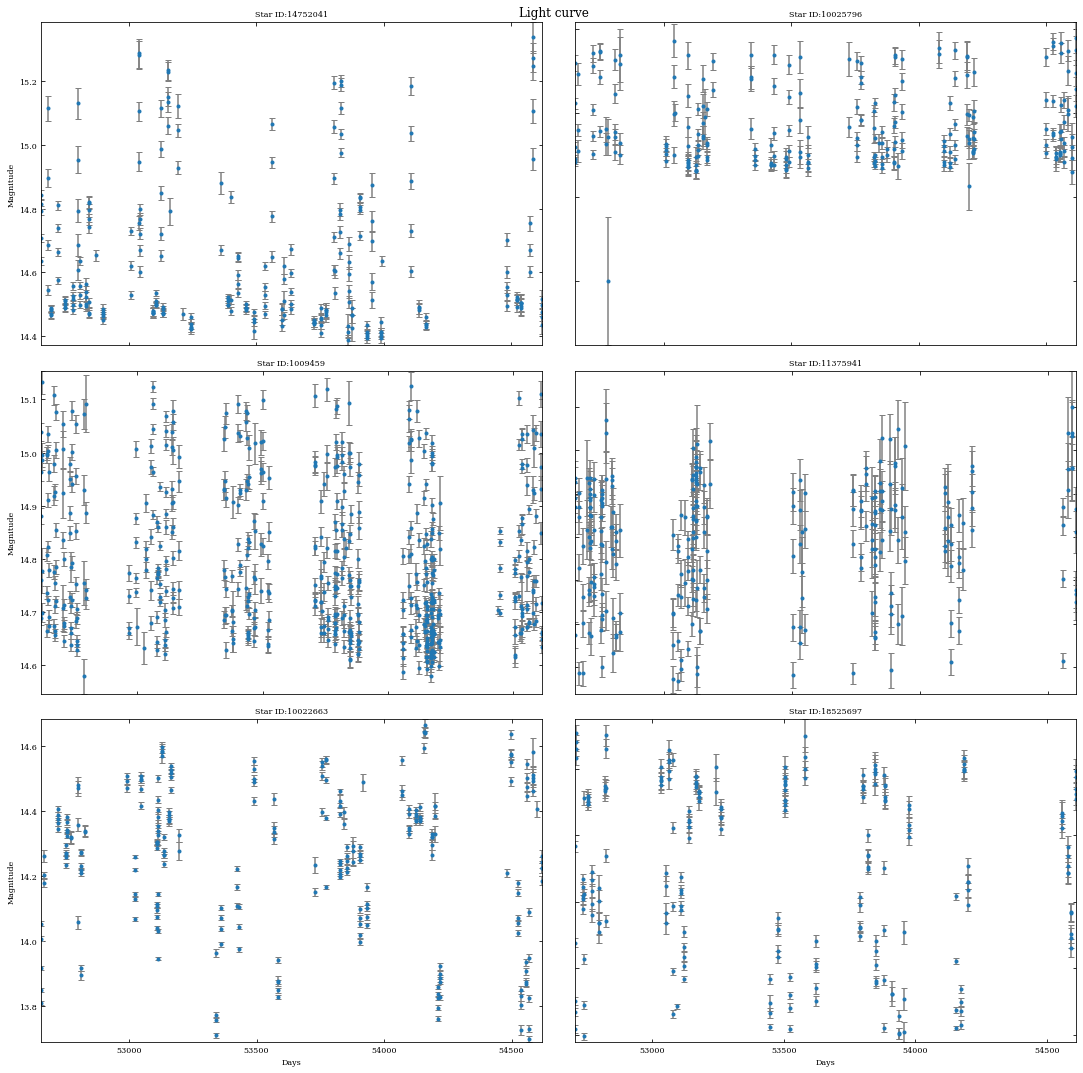

In [33]:
#Plot light curves

import math

fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15, 15))
fig.suptitle('Light curve')
fig.tight_layout()

for i in ids:
    p, q, dq = data[i].T
    #Plot
    j = ids.index(i)
    row = j%3
    col = math.floor(j/3)
    ax[row,col].errorbar(p, q, dq, fmt='.', ecolor='gray')
    ax[row,col].set_title('Star ID:'+str(i))
    
#Ajust plot labels
for a in ax.flat:
    a.set(xlabel='Days', ylabel='Magnitude')
for a in ax.flat:
    a.label_outer() 
    



Star ID:  14752041 Best Period:  17.21695506144702
Star ID:  1009459 Best Period:  51.106008075157476
Star ID:  10022663 Best Period:  10.200626760943159
Star ID:  10025796 Best Period:  45.554935027919875
Star ID:  11375941 Best Period:  58.445122771779104
Star ID:  18525697 Best Period:  10.82722771749013


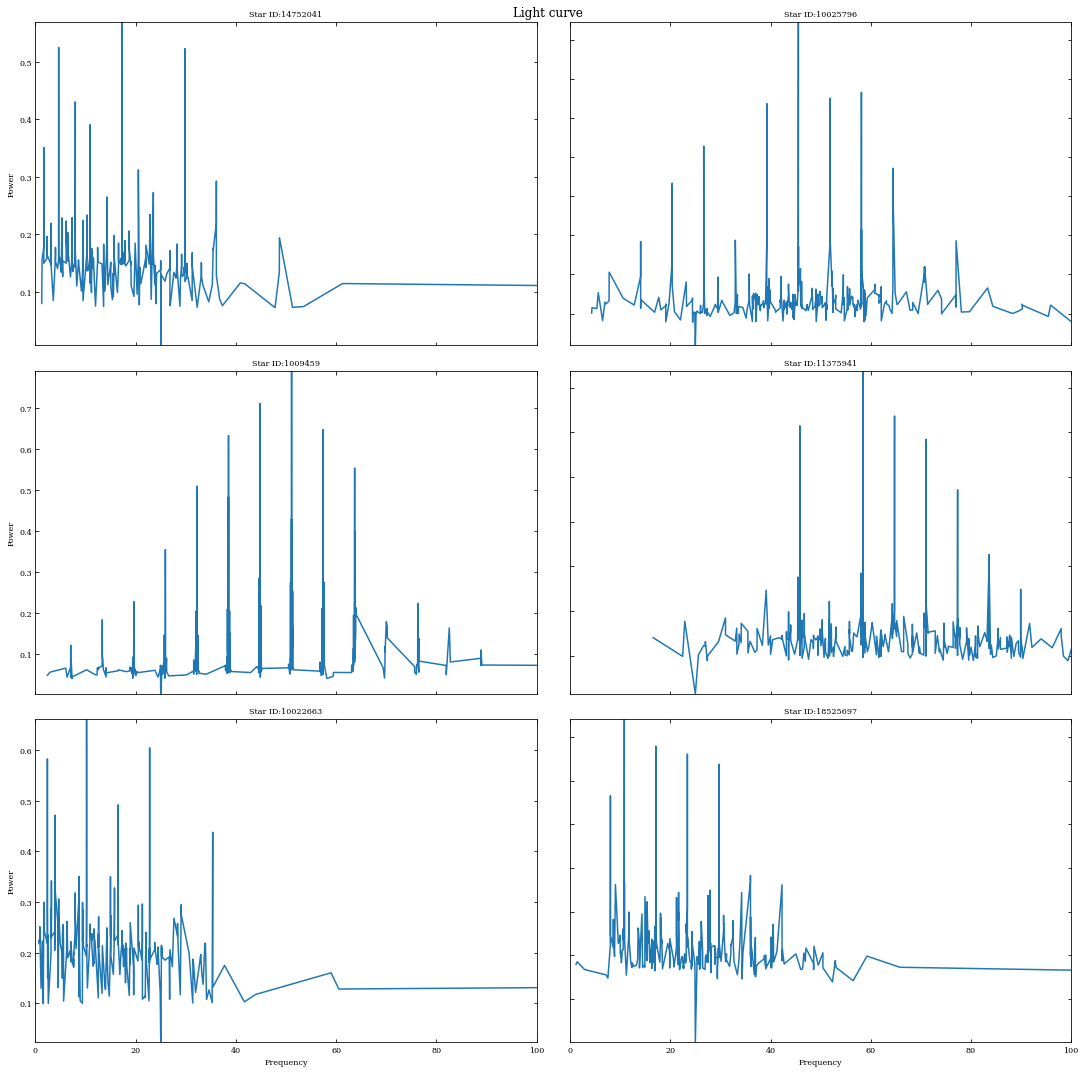

In [39]:
# b) compute the best period using a Fourier transformation
best = []
for starID in ids:
    maxFlux_index = np.argmax(results[starID][1]) #Find index highest flux on periodogram
    optimalPeriod = results[starID][0][maxFlux_index]#Compute period at maxFlux
    print("Star ID: ", starID,"Best Period: ", optimalPeriod)
    best.append(optimalPeriod)
    
# Plotting
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15, 15))
fig.suptitle('Light curve')
fig.tight_layout()
for i in ids:
    j = ids.index(i)
    row = j%3
    col = math.floor(j/3)
    p, q, dq = data[i].T
    
    ax[row,col].plot(results[i][0], results[i][1])
    ax[row,col].set_title('Star ID:'+str(i))
    ax[row,col].set_xlim(0,100)
    
for a in ax.flat:
    a.set(xlabel='Frequency', ylabel='Power')
for a in ax.flat:
    a.label_outer()


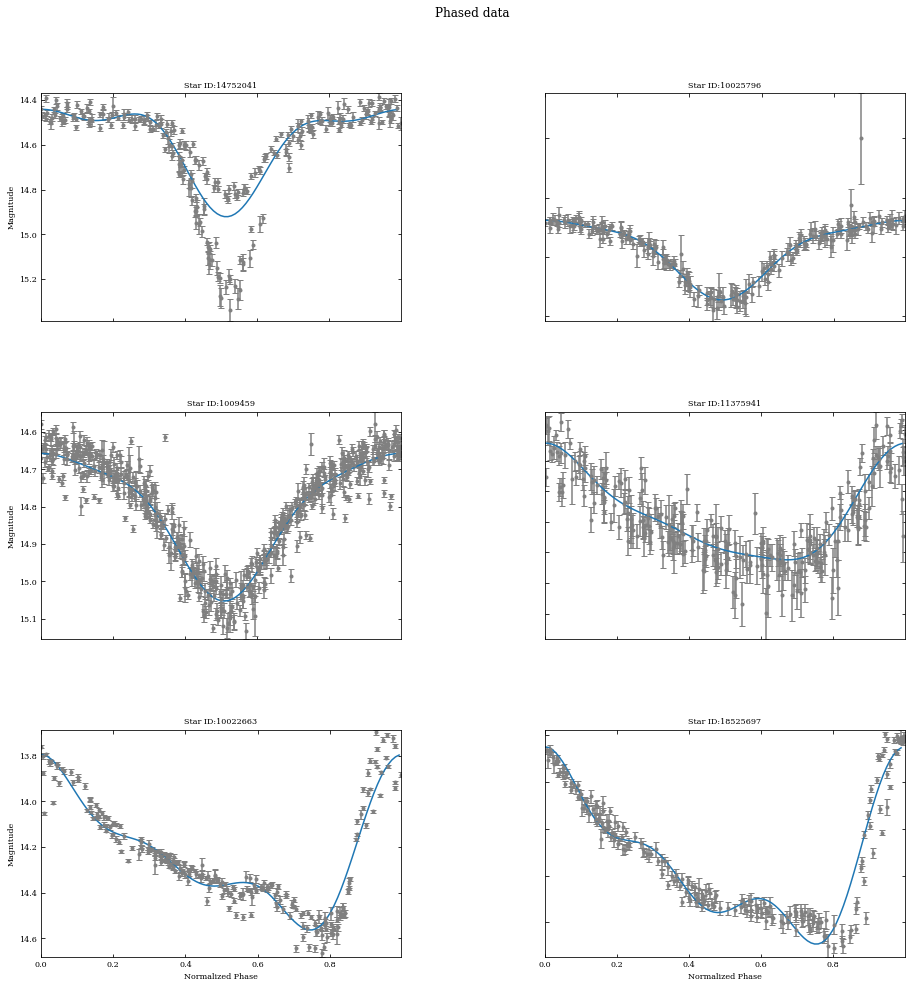

In [44]:
# c) plot the phased data and best-fit curves.

fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15, 15))
fig.suptitle('Phased data')
fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i in range(len(ids)):
    p, q, dq = data[ids[i]].T
    p = p - p[0]
    
    #Generate best fit curve
    result = MultiTermFit(best[i], 3)
    result.fit(p, q, dq)
    phase_fit, q_fit, phased_q = result.predict(100, return_phased_times=True)

    #Plotting
    row = i%3
    col = math.floor(i/3)
    ax[row,col].errorbar(phased_q, q, dq, fmt='.', color='gray')
    ax[row,col].plot(phase_fit, q_fit)
    ax[row,col].set_title('Star ID:'+str(ids[i]))
    ax[row,col].invert_yaxis()
    
for a in ax.flat:
    a.set(xlabel='Normalized Phase', ylabel='Magnitude')
for a in ax.flat:
    a.label_outer()

Finding optimal frequency:
 - Estimated peak width = 0.00319
 - Using 5 steps per peak; omega_step = 0.000639
 - User-specified period range:  0.01 to 1.2
 - Computing periods at 975205 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00314
 - Using 5 steps per peak; omega_step = 0.000628
 - User-specified period range:  0.01 to 1.2
 - Computing periods at 992539 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.0032
 - Using 5 steps per peak; omega_step = 0.000639
 - User-specified period range:  0.01 to 1.2
 - Computing periods at 974711 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.0032
 - Using 5 steps per peak; omega_step = 0.000639
 - User-specified period range:  0.01 to 1.2
 - Computing periods at 974710 steps
Zooming-in on 5 candidate peak

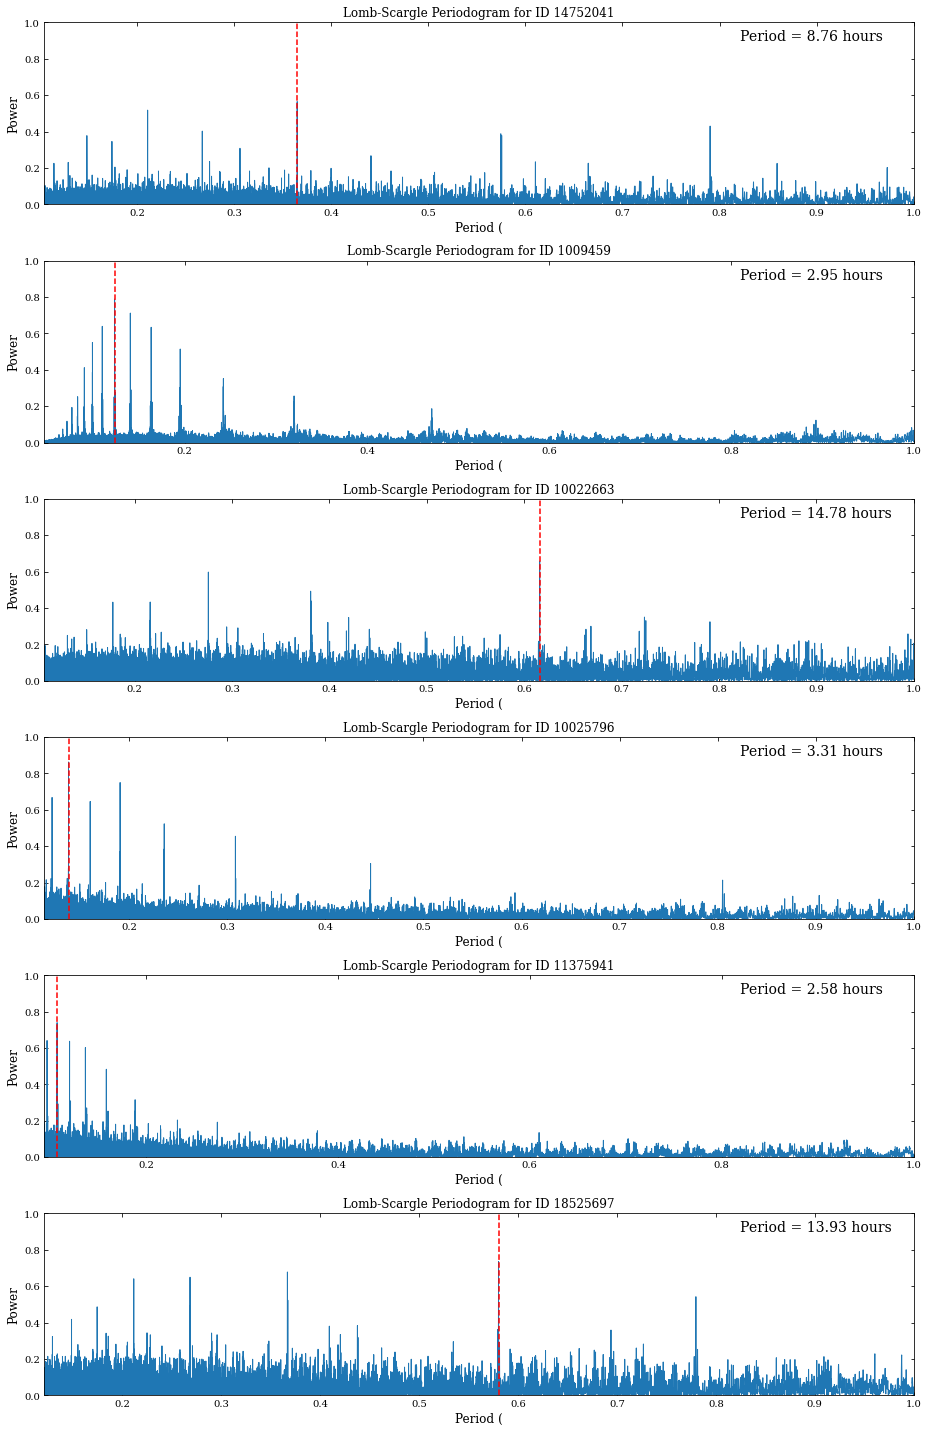

In [48]:
# d) Solve the problem by using Lomb-Scargle Periodograms.

from gatspy.periodic import LombScargleFast

fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(15, 15))
fig.set_figheight(20)
fig.set_figwidth(13)

# Getting data and computing
for idx, i in enumerate(ids):
    t, y, dy = data[i].T
    model = LombScargleFast(fit_period=True)
    model.optimizer.period_range = (0.01, 1.2)
    model.fit(t, y, dy)
    periods, power = model.periodogram_auto(nyquist_factor=150)
    
#PLotting the periodigram
    ax[idx].plot(periods, power, lw=1)
    ax[idx].tick_params(axis='both', which='major', labelsize=10)
    ax[idx].set_xlabel('Period (', fontsize=12)
    ax[idx].set_ylabel('Power', fontsize=12)
    ax[idx].set_xlim(periods.min(), 1)
    ax[idx].set_ylim(0, 1)
    ax[idx].set_title(f'Lomb-Scargle Periodogram for ID {i}', fontsize=12)
    ax[idx].text(0.8, 0.96, "Period = %.2f hours" % (model.best_period * 24),
            ha='left', va='top', transform=ax[idx].transAxes, fontsize=14)
    ax[idx].axvline(model.best_period, c='r', ls='dashed')
    
plt.tight_layout()
plt.show()